# Prediction of Weather at Jena, Germany

Refer https://www.bgc-jena.mpg.de/wetter


### Packages & Some Initializations

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Refers required packages

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LSTM, GRU, Bidirectional
from tensorflow.keras.optimizers import Adam, RMSprop

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Applies the default theme

sns.set_theme()

### Downloads & Loads Data

In [ ]:
# Creates a subfolder under current working director to save all data files

""" Makes the following code block as comment block to prevent re-downloading when entire
notebook is run at once

!mkdir "Data"


# Downloads raw data into the subfolder

!wget https://www.bgc-jena.mpg.de/wetter/mpi_roof_2009a.zip -P Data
!wget https://www.bgc-jena.mpg.de/wetter/mpi_roof_2009b.zip -P Data
!wget https://www.bgc-jena.mpg.de/wetter/mpi_roof_2010a.zip -P Data
!wget https://www.bgc-jena.mpg.de/wetter/mpi_roof_2010b.zip -P Data
!wget https://www.bgc-jena.mpg.de/wetter/mpi_roof_2011a.zip -P Data
!wget https://www.bgc-jena.mpg.de/wetter/mpi_roof_2011b.zip -P Data
!wget https://www.bgc-jena.mpg.de/wetter/mpi_roof_2012a.zip -P Data
!wget https://www.bgc-jena.mpg.de/wetter/mpi_roof_2012b.zip -P Data
!wget https://www.bgc-jena.mpg.de/wetter/mpi_roof_2013a.zip -P Data
!wget https://www.bgc-jena.mpg.de/wetter/mpi_roof_2013b.zip -P Data
!wget https://www.bgc-jena.mpg.de/wetter/mpi_roof_2014a.zip -P Data
!wget https://www.bgc-jena.mpg.de/wetter/mpi_roof_2014b.zip -P Data
!wget https://www.bgc-jena.mpg.de/wetter/mpi_roof_2015a.zip -P Data
!wget https://www.bgc-jena.mpg.de/wetter/mpi_roof_2015b.zip -P Data
!wget https://www.bgc-jena.mpg.de/wetter/mpi_roof_2016a.zip -P Data
!wget https://www.bgc-jena.mpg.de/wetter/mpi_roof_2016b.zip -P Data

    
# Unzips all the downloaded zip files

!unzip Data/mpi_roof_2009a.zip -d Data
!unzip Data/mpi_roof_2009b.zip -d Data
!unzip Data/mpi_roof_2010a.zip -d Data
!unzip Data/mpi_roof_2010b.zip -d Data
!unzip Data/mpi_roof_2011a.zip -d Data
!unzip Data/mpi_roof_2011b.zip -d Data
!unzip Data/mpi_roof_2012a.zip -d Data
!unzip Data/mpi_roof_2012b.zip -d Data
!unzip Data/mpi_roof_2013a.zip -d Data
!unzip Data/mpi_roof_2013b.zip -d Data
!unzip Data/mpi_roof_2014a.zip -d Data
!unzip Data/mpi_roof_2014b.zip -d Data
!unzip Data/mpi_roof_2015a.zip -d Data
!unzip Data/mpi_roof_2015b.zip -d Data
!unzip Data/mpi_roof_2016a.zip -d Data
!unzip Data/mpi_roof_2016b.zip -d Data


"""

In [3]:
# Reads ll CSV files and concats them

data_files = [
              "mpi_roof_2009a.csv",
              "mpi_roof_2009b.csv",
              "mpi_roof_2010a.csv",
              "mpi_roof_2010b.csv",
              "mpi_roof_2011a.csv",
              "mpi_roof_2011b.csv",
              "mpi_roof_2012a.csv",
              "mpi_roof_2012b.csv",
              "mpi_roof_2013a.csv",
              "mpi_roof_2013b.csv",
              "mpi_roof_2014a.csv",
              "mpi_roof_2014b.csv",
              "mpi_roof_2015a.csv",
              "mpi_roof_2015b.csv",
              "mpi_roof_2016a.csv",
              "mpi_roof_2016b.csv"]

data = []
for data_file in data_files:
  data.append(pd.read_csv("./Data/" + data_file, encoding="latin_1"))

data = pd.concat(data, axis=0, ignore_index=True)

### Exploratory Data Analysis

In [11]:
# Checks shape of the data
data.shape

(420551, 22)

In [4]:
# Checks first few samples

data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,...,1.03,1.75,152.3,0.0,0.0,0.0,0.0,0.0,7.20,434.4
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,...,0.72,1.50,136.1,0.0,0.0,0.0,0.0,0.0,7.15,436.2
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,...,0.19,0.63,171.6,0.0,0.0,0.0,0.0,0.0,7.09,435.1
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,...,0.34,0.50,198.0,0.0,0.0,0.0,0.0,0.0,7.38,427.1
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,...,0.32,0.63,214.3,0.0,0.0,0.0,0.0,0.0,8.28,415.5


In [5]:
data.tail()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,...,0.67,1.52,240.0,0.0,0.0,0.0,0.0,0.0,7.37,429.8
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,...,1.14,1.92,234.3,0.0,0.0,0.0,0.0,0.0,7.29,428.7
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,...,1.08,2.00,215.2,0.0,0.0,0.0,0.0,0.0,7.21,428.6
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,...,1.49,2.16,225.8,0.0,0.0,0.0,0.0,0.0,7.14,430.0
420550,01.01.2017 00:00:00,999.82,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,...,1.23,1.96,184.9,0.0,0.0,0.0,0.0,0.0,7.08,432.7


In [6]:
# Checks for types of the data

data.dtypes

Date Time                object
p (mbar)                float64
T (degC)                float64
Tpot (K)                float64
Tdew (degC)             float64
rh (%)                  float64
VPmax (mbar)            float64
VPact (mbar)            float64
VPdef (mbar)            float64
sh (g/kg)               float64
H2OC (mmol/mol)         float64
rho (g/m**3)            float64
wv (m/s)                float64
max. wv (m/s)           float64
wd (deg)                float64
rain (mm)               float64
raining (s)             float64
SWDR (W/m²)             float64
PAR (µmol/m²/s)         float64
max. PAR (µmol/m²/s)    float64
Tlog (degC)             float64
CO2 (ppm)               float64
dtype: object

In [7]:
# Gets the basic statistics of the data

data.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,...,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,...,1.702224,3.056555,174.743738,0.009639,50.162575,122.881737,240.693832,291.966714,21.505132,378.581341
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,...,65.446714,69.016932,86.681693,0.104128,157.204619,206.209010,399.738488,521.180595,8.036716,562.157602
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,...,-9999.000000,-9999.000000,0.000000,0.000000,-9999.000000,0.000000,0.000000,-9999.000000,4.310000,-9999.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,...,0.990000,1.760000,124.900000,0.000000,0.000000,0.000000,0.000000,0.000000,15.350000,395.800000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,...,1.760000,2.960000,198.100000,0.000000,0.000000,2.410000,7.920000,10.810000,20.900000,405.900000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,...,2.860000,4.740000,234.100000,0.000000,0.000000,164.390000,327.610000,387.450000,27.060000,419.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,...,28.490000,23.500000,360.000000,14.000000,600.000000,1219.320000,2401.540000,2500.000000,50.470000,586.000000


In [8]:
# Checks for missing data in the dataset

data.isna().sum()

Date Time               0
p (mbar)                0
T (degC)                0
Tpot (K)                0
Tdew (degC)             0
rh (%)                  0
VPmax (mbar)            0
VPact (mbar)            0
VPdef (mbar)            0
sh (g/kg)               0
H2OC (mmol/mol)         0
rho (g/m**3)            0
wv (m/s)                0
max. wv (m/s)           0
wd (deg)                0
rain (mm)               0
raining (s)             0
SWDR (W/m²)             0
PAR (µmol/m²/s)         0
max. PAR (µmol/m²/s)    0
Tlog (degC)             0
CO2 (ppm)               0
dtype: int64

In [9]:
data.corr()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
p (mbar),1.000000,-0.045375,-0.124718,-0.066755,-0.018352,-0.031546,-0.054370,-0.003401,-0.069762,-0.069804,...,-0.005701,-0.007760,-0.063258,-0.057042,-0.143755,0.052353,0.047447,0.031203,-0.002421,0.027613
T (degC),-0.045375,1.000000,0.996827,0.895708,-0.572416,0.951113,0.867673,0.761744,0.866755,0.867177,...,-0.004689,-0.002871,0.038732,0.017093,-0.104010,0.458587,0.468301,0.433787,0.961963,-0.029239
Tpot (K),-0.124718,0.996827,1.000000,0.894911,-0.567127,0.947293,0.866205,0.756962,0.866533,0.866955,...,-0.004195,-0.002224,0.043599,0.021568,-0.091885,0.451280,0.461317,0.428361,0.955699,-0.031258
Tdew (degC),-0.066755,0.895708,0.894911,1.000000,-0.156615,0.799271,0.968344,0.435752,0.967599,0.968044,...,-0.008718,-0.009091,0.049877,0.059647,-0.005961,0.232909,0.244963,0.231339,0.835434,-0.013746
rh (%),-0.018352,-0.572416,-0.567127,-0.156615,1.000000,-0.615842,-0.151494,-0.843835,-0.150841,-0.150969,...,-0.005020,-0.009921,-0.015912,0.076892,0.243392,-0.575452,-0.574536,-0.528609,-0.589908,0.038430
VPmax (mbar),-0.031546,0.951113,0.947293,0.799271,-0.615842,1.000000,0.824865,0.875588,0.824460,0.824493,...,-0.004018,-0.002213,-0.009583,0.007355,-0.110817,0.503026,0.513515,0.469848,0.950570,-0.029179
VPact (mbar),-0.054370,0.867673,0.866205,0.968344,-0.151494,0.824865,1.000000,0.449154,0.999851,0.999856,...,-0.009600,-0.010316,0.018418,0.065872,-0.007830,0.239336,0.251624,0.235773,0.835860,-0.007929
VPdef (mbar),-0.003401,0.761744,0.756962,0.435752,-0.843835,0.875588,0.449154,1.000000,0.448641,0.448689,...,0.001852,0.005317,-0.030881,-0.044663,-0.168444,0.590483,0.596561,0.541093,0.788071,-0.039341
sh (g/kg),-0.069762,0.866755,0.866533,0.967599,-0.150841,0.824460,0.999851,0.448641,1.000000,0.999997,...,-0.009479,-0.010163,0.019376,0.067104,-0.005264,0.238030,0.250370,0.234856,0.834658,-0.008294
H2OC (mmol/mol),-0.069804,0.867177,0.866955,0.968044,-0.150969,0.824493,0.999856,0.448689,0.999997,1.000000,...,-0.009477,-0.010158,0.019607,0.067061,-0.005258,0.238072,0.250413,0.234912,0.834924,-0.008333


In [11]:
# Extracts temperature information as series from the data

temp = data["T (degC)"]

#### Let's understand the temperature periodicity over the period full 9 years, one year, one month, one week, one day and one hour.

<AxesSubplot:title={'center':'Temperature Periodicity over 1 Hour'}, ylabel='T (degC)'>

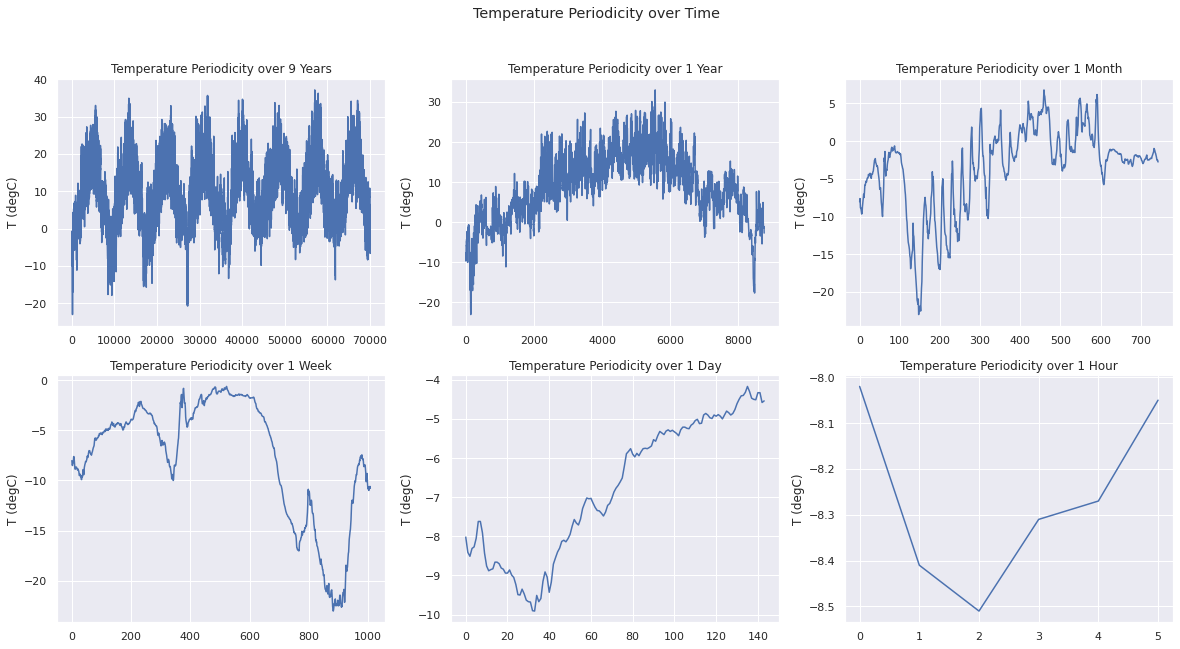

In [12]:
# Plots the periodicities

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Temperature Periodicity over Time')
axes[0][0].set_title('Temperature Periodicity over 9 Years')
axes[0][1].set_title('Temperature Periodicity over 1 Year')
axes[0][2].set_title('Temperature Periodicity over 1 Month')
axes[1][0].set_title('Temperature Periodicity over 1 Week')
axes[1][1].set_title('Temperature Periodicity over 1 Day')
axes[1][2].set_title('Temperature Periodicity over 1 Hour')

sns.lineplot(ax=axes[0, 0], data=temp[::6], x=range(len(temp[::6])), y=temp[::6])
sns.lineplot(ax=axes[0, 1], data=temp[:52560][::6], x=range(len(temp[:52560][::6])), y=temp[:52560][::6])
sns.lineplot(ax=axes[0, 2], data=temp[:4464][::6], x=range(len(temp[:4464][::6])), y=temp[:4464][::6])
sns.lineplot(ax=axes[1, 0], data=temp[:1008], x=range(len(temp[:1008])), y=temp[:1008])
sns.lineplot(ax=axes[1, 1], data=temp[:144], x=range(len(temp[:144])), y=temp[:144])
sns.lineplot(ax=axes[1, 2], data=temp[:6], x=range(len(temp[:6])), y=temp[:6])


### Problem Statement

#### From the above plot, it is clear that temperature is periodic over year and month, and hence it will be easy to predict average temperature for next month from the reliable year-scale data. But the temperatue at day-scale, it looks chaotic.

#### So, let's set problem statement as to find temperature for future day from historical data. This problem should be flexible and hence let's make these "future day" and "historical data" variables and configurable. So, the solution will be able predict Xth day's temperature from from Y days past data from now.

### Data Preparation

#### As the dataset for these 9 years is significant in terms of some preprocessing, model training and validation, let's see if data can be reduced without compromising model performance. Hence, let's check the temperature variation in the subsequent readings between 10 minutes.

In [10]:
# The following execution may take several seconds to complete

data["T (degC)"].rolling(window=2).apply(
    lambda x: x.iloc[1] - x.iloc[0]).describe()

count    420550.000000
mean          0.000008
std           0.248254
min          -5.240000
25%          -0.110000
50%          -0.010000
75%           0.090000
max           3.180000
Name: T (degC), dtype: float64

#### From the above statistics, it is clear that temperature does not fluctuate much across 10 minutes which is the interval at which observations were recorded. So, let's consider one observation in an hour and prepare the data accordingly.

In [4]:
data_small = data[::6]
data_small.reset_index(drop=True, inplace=True)

In [5]:
# Checks the shape of the data

data_small.shape

(70092, 22)

#### Normalizes the data first and creates one data generator that generates training, validation and test data.

In [6]:
# First remove column "Date Time" as it is no more required

data_small_array = data_small.drop(["Date Time"], axis=1).to_numpy()

In [7]:
# Performs Z-Score normalization on the first 42000 observations 
# which is 60% (around 5 years) of all the data (9 years)

mean = data_small_array[:42000].mean(axis=0)
data_small_array -= mean

std = data_small_array[:42000].std(axis=0)
data_small_array /= std

In [8]:
# Creates a data generator

def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128):
    
    """
    Returns batches of data from recent past along with target temperature in future
    
    Parameters
    ===============
        data: Timeseries dataset to iterate and generate the data from
        
        lookback: Number of timesteps to go back
        
        delay: Number of timesteps to target in future
        
        min_index: Minimun index of data to consider from
        
        max_index: Maximum index of data to consider up to
        
        shuffle (*Not yet correctly implemented*)): Whether to shuffle the samples or draw them in chronological order
        
        batch_size: Number of samples to return in a batch
        
    """
    
    if max_index is None:
        max_index = len(data) - delay - 1
    else:
        max_index -= delay
    
    i = min_index + lookback
    
    while True:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
            #rows = np.arange(min_index + lookback, max_index + 1)
            #np.random.shuffle(rows)
        else:
            if (i + batch_size - 1) > max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index + 1))
            i += len(rows)
        
        samples = np.zeros((len(rows), lookback, data.shape[-1]))
        targets = np.zeros((len(rows),))
        
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j])
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
            
        yield samples, targets

In [9]:
# Historical data for last 10 days will be looked back (there are 24 observations for a day)

lookback = 24*10

# Timesteps to look for in the future for prediction

delay = 24

# Number of samples in each batch

batch_size = 128

In [10]:
# Sets the index to act as partition information amongs train, validation and test data

train_data_max_index = 42000
val_data_max_index = 56000
test_data_max_index = len(data_small_array) - 1

In [11]:
# Now, instantiate generators for train, validation and test data

train_gen = generator(data_small_array, lookback=lookback, delay=delay, min_index=0, 
                      max_index=train_data_max_index, shuffle=False, batch_size=batch_size)

val_gen = generator(data_small_array, lookback=lookback, delay=delay, min_index=train_data_max_index + 1, 
                    max_index=val_data_max_index, shuffle=False, batch_size=batch_size)

test_gen = generator(data_small_array, lookback=lookback, delay=delay, min_index=val_data_max_index + 1, 
                     max_index=test_data_max_index, shuffle=False, batch_size=batch_size)

In [12]:
train_steps = (train_data_max_index - delay - (lookback) + 1) // batch_size
val_steps = (val_data_max_index - delay - (train_data_max_index + 1 + lookback) + 1) // batch_size
test_steps = (test_data_max_index - delay - (val_data_max_index + 1 + lookback) + 1) // batch_size


### Modeling

#### Common Sense Baseline

#### Let's have a common sense baseline first before going into other machine learning model. The idea is that the other model should be able to justify its value in terms of performing better than the common sense baseline.

#### With the assumption that temperatue at 24 hours from now will be equal to the temperature right now, let's build one common sense baseline on it.

In [20]:
def get_maes_from_common_sense():
    batch_maes = []
    
    for step in range(val_steps):
        samples, targets = next(val_gen)
        pred = samples[:, -1, 1]
        mae = np.mean(np.abs(pred - targets))
        batch_maes.append(mae)
    
    return np.mean(batch_maes)

In [21]:
mae_from_common_sense = get_maes_from_common_sense()    # This execution may take several minutes to complete

print("Mean absolute errr (MAE) baseline from common sense:", 
     mae_from_common_sense * std[1])

### Now, let's build a Fully Connected Neural Network Model

In [13]:
# Sets the number of epoch during model training

epochs = 20

In [358]:
# Creates the model

model = Sequential()
model.add(Flatten(input_shape=(lookback, data_small_array.shape[-1])))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))

In [364]:
# Compiles and starts training

model.compile(optimizer=RMSprop(), loss="mae")

history = model.fit(
    train_gen, 
    steps_per_epoch=train_steps,    # 500 instead of train_steps is being used to save computation
    epochs=epochs,
    validation_data=val_gen, 
    validation_steps=val_steps    # instead of val_steps is being used to save computation
)

Epoch 1/20
326/326 [==============================] - 9s 27ms/step - loss: 3.7453 - val_loss: 0.9427
Epoch 2/20
326/326 [==============================] - 8s 26ms/step - loss: 2.0238 - val_loss: 1.0456
Epoch 3/20
326/326 [==============================] - 9s 27ms/step - loss: 1.6687 - val_loss: 0.6148
Epoch 4/20
326/326 [==============================] - 10s 30ms/step - loss: 1.4247 - val_loss: 0.5720
Epoch 5/20
326/326 [==============================] - 9s 26ms/step - loss: 1.2046 - val_loss: 0.4988
Epoch 6/20
326/326 [==============================] - 9s 26ms/step - loss: 0.9918 - val_loss: 0.4120
Epoch 7/20
326/326 [==============================] - 10s 30ms/step - loss: 0.9764 - val_loss: 0.3959
Epoch 8/20
326/326 [==============================] - 9s 27ms/step - loss: 0.8606 - val_loss: 0.4515
Epoch 9/20
326/326 [==============================] - 9s 26ms/step - loss: 0.7685 - val_loss: 0.3834
Epoch 10/20
326/326 [==============================] - 9s 27ms/step - loss: 0.8055 - val_

In [365]:
# Plots the performance

history = history.history

plt.plot(range(1,epochs+1), history["loss"], "bo")
plt.plot(range(1,epochs+1), history["val_loss"], "b")

#### It is clear from the above plot that its validation performance could not beat the performance of common sense baseline.

#### Let's use Gated Recurrent Unit (GRU) next.

In [368]:
# Creates model

model = Sequential()
model.add(GRU(32, input_shape=(None, data_small_array.shape[-1])))
model.add(Dense(1))

In [371]:
# Compiles and starts training

model.compile(optimizer=RMSprop(), loss="mae")

history = model.fit(train_gen, 
                    steps_per_epoch=train_steps, 
                    epochs=epochs, 
                    validation_data=val_gen, 
                    validation_steps=val_steps)

Epoch 1/20
326/326 [==============================] - 127s 384ms/step - loss: 0.3321 - val_loss: 0.3087
Epoch 2/20
326/326 [==============================] - 157s 481ms/step - loss: 0.2973 - val_loss: 0.2992
Epoch 3/20
326/326 [==============================] - 151s 464ms/step - loss: 0.2894 - val_loss: 0.2953
Epoch 4/20
326/326 [==============================] - 155s 476ms/step - loss: 0.2861 - val_loss: 0.2936
Epoch 5/20
326/326 [==============================] - 153s 470ms/step - loss: 0.2835 - val_loss: 0.2912
Epoch 6/20
326/326 [==============================] - 163s 499ms/step - loss: 0.2811 - val_loss: 0.2909
Epoch 7/20
326/326 [==============================] - 170s 523ms/step - loss: 0.2790 - val_loss: 0.2918
Epoch 8/20
326/326 [==============================] - 175s 537ms/step - loss: 0.2772 - val_loss: 0.2921
Epoch 9/20
326/326 [==============================] - 178s 545ms/step - loss: 0.2755 - val_loss: 0.2916
Epoch 10/20
326/326 [==============================] - 170s 523m

In [372]:
# Plots the performance

history = history.history

plt.plot(range(1,epochs+1), history["loss"], "bo")
plt.plot(range(1,epochs+1), history["val_loss"], "b")

#### The above plot shows that the model is not overfitted. Let's now check if the model is underfitted or not, and hence stacked Recurrent Neural Network (RNN) is being used now.

In [20]:
# Creates model

model = Sequential()
model.add(GRU(32, return_sequences=True, input_shape=(None, data_small_array.shape[-1])))
model.add(GRU(64))
model.add(Dense(1))

In [ ]:
# Compiles model and starts training

model.compile(optimizer=RMSprop(), loss="mae")

history = model.fit(train_gen, 
                    steps_per_epoch=train_steps, 
                    epochs=epochs, 
                    validation_data=val_gen,
                    validation_steps=val_steps)

Epoch 1/20
326/326 [==============================] - 301s 910ms/step - loss: 0.3296 - val_loss: 0.2905
Epoch 2/20
326/326 [==============================] - 320s 983ms/step - loss: 0.3017 - val_loss: 0.2841
Epoch 3/20
326/326 [==============================] - 304s 931ms/step - loss: 0.2940 - val_loss: 0.2839
Epoch 4/20
326/326 [==============================] - 308s 946ms/step - loss: 0.2892 - val_loss: 0.2851
Epoch 5/20
326/326 [==============================] - 311s 953ms/step - loss: 0.2857 - val_loss: 0.2872
Epoch 6/20
326/326 [==============================] - 309s 947ms/step - loss: 0.2834 - val_loss: 0.2904
Epoch 7/20
326/326 [==============================] - 322s 987ms/step - loss: 0.2808 - val_loss: 0.2907
Epoch 8/20
326/326 [==============================] - 305s 935ms/step - loss: 0.2784 - val_loss: 0.2945
Epoch 9/20
326/326 [==============================] - 317s 974ms/step - loss: 0.2764 - val_loss: 0.2969
Epoch 10/20
326/326 [==============================] - 322s 985m

#### Validation losses improve very little with the stacked RNNs as evident from the above epoch information, and this costly stacked RNNs computation should considered to be an approach with the diminishing returns. Hence, we shall not consider this approach.

### Future Work:

    1) Selection of hidden units and layers in the RNNs was arbirary and hence performance could be sub-optimul. Adding capacity to these RNNs can be consided to check if performance improves.
    
    2) Instead of GRU, other RNN architectures such as Long Short-term Memory (LSTM) and hybrid approach e.g. Bidirectional RNNs can also be explored.
    
    3) Experimenting with hyperparameters such as learning rate.
    
    4) Adding bigger or stack of Dense layers on top of RNNs.
    
    5) Complete implementation for parameter "shuffle" in function "generator" as it is not not yet correctly implemented and hence all calls to this function were made passing "False" value against this parameter. The purpose of this parameter when set "True" (1) would fetch a batch of samples from random location, and (2) would not return duplicate batch, and (3) should cover all possible batch to return. 

**Note:** Best performing model should be finally be scored on test data to avoid these experimental models to be overfitted with validation data.